# Project 2
#### __Selected data set should include at least two (2) numeric variables and one (1) categorical variable.__

## Part 1: Introduction
#### A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.

Real Plus-Minus (RPM) tells how much better a team played on offense and defense when a given player was on the floor, and how much that improvement was that individual player's doing. And this is regarded as the most effective way to consider winning rate. I want to figure out this relationship by asking three questions below.

### Research question I hope to answer with it
__- What is the relationship between the RPM and WINS?__

__- What are the top 3 positions that have the highest rate of RPM?__

__- Which 9 teams have the highest RPM value?__

## Part 2: Data Summary
#### Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc.

This data came from __kaggle.com - Social Power NBA__. There are nine attrubutes (NAME, POSITION, TEAM, GP, MPG, ORPM, DRPM, RPM and WINS). 
Details of the eight attrubutes:

- NAME = Player's name
- TEAM = Player's team
- GP = Games Played
- MPG = Minutes Played Per Game
- ORPM = Player's estimated on-court impact on team offensive performance, measured in points scored per 100 offensive possessions
- DRPM = Player's estimated on-court impact on team defensive performance, measured in points allowed per 100 defensive possessions
- RPM = Player's estimated on-court impact on team performance, measured in net point differential per 100 offensive and defensive possessions. RPM takes into account teammates, opponents and additional factors
- WINS = "RPM Wins" provide an estimate of the number of wins each player has contributed to his team's win total on the season. RPM Wins include the player's Real Plus-Minus and his number of possessions played.

In [355]:
# load matplotlib library
import matplotlib.pyplot as plt
%matplotlib nbagg
# load seaborn
import seaborn as sns
# load numpy 
import numpy as np
# load pandas
import pandas as pd

In [356]:
# show NBA data which as nine attrubutes (NAME, POSITION, TEAM, GP, MPG, ORPM, DRPM, RPM and WINS).
NBA = pd.read_csv('https://raw.githubusercontent.com/sunpark92/DAV-5400/master/nba_2017_real_plus_minus.csv')
NBA.head(10)

,NAME,POSITION,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,LeBron James,SF,CLE,74,37.8,6.49,1.93,8.42,20.43
1,Stephen Curry,PG,GS,79,33.4,7.27,0.14,7.41,18.80
2,Jimmy Butler,SG,CHI,76,37.0,4.82,1.80,6.62,17.35
3,Russell Westbrook,PG,OKC,81,34.6,6.74,-0.47,6.27,17.34
4,Draymond Green,PF,GS,76,32.5,1.55,5.59,7.14,16.84
5,Rudy Gobert,C,UTAH,81,33.9,0.35,6.02,6.37,15.55
6,James Harden,SG,HOU,81,36.4,6.38,-1.57,4.81,15.54
7,Kawhi Leonard,SF,SA,74,33.4,5.83,1.25,7.08,15.53
8,Chris Paul,PG,LAC,61,31.5,5.16,2.76,7.92,13.48
9,Nikola Jokic,C,DEN,73,27.9,4.44,2.29,6.73,13.18


## Part 3: Exploratory Data Analysis (EDA)
#### Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings.

Except for NAME, POSITION and TEAM, the rest of the attributes (GP, MPG, ORPM, DRPM, RPM and WINS) are numeric variables. These numeric variables are also mostly continuous. For this reason, summary statistics will only be run for all numeric variables, but NAME will be used as indexs for readers.

In [357]:
NBA.describe()  # description of the numeric data

,GP,MPG,ORPM,DRPM,RPM,WINS
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,55.594017,20.267949,-0.849979,-0.015128,-0.865107,2.520748
std,23.462616,8.968281,1.956953,1.553630,2.410860,3.632323
min,1.000000,1.000000,-4.430000,-3.920000,-6.600000,-2.320000
25%,38.750000,13.250000,-2.222500,-1.072500,-2.430000,0.070000
50%,64.000000,19.900000,-1.280000,-0.140000,-1.270000,1.060000
75%,75.000000,27.400000,0.070000,0.992500,0.522500,3.880000
max,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000


__Provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn__

<IPython.core.display.Javascript object>


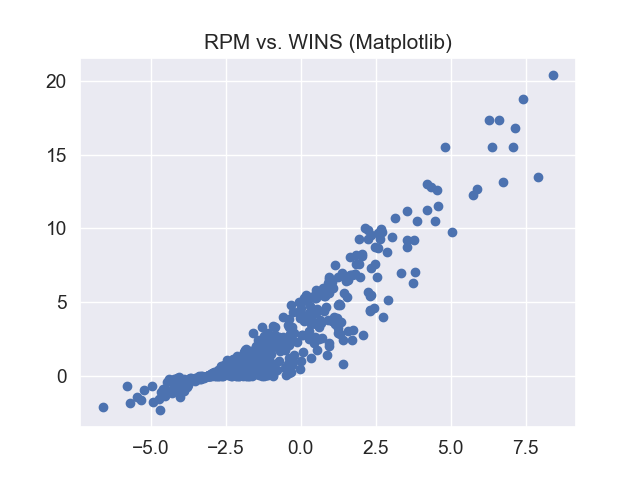

<IPython.core.display.Javascript object>


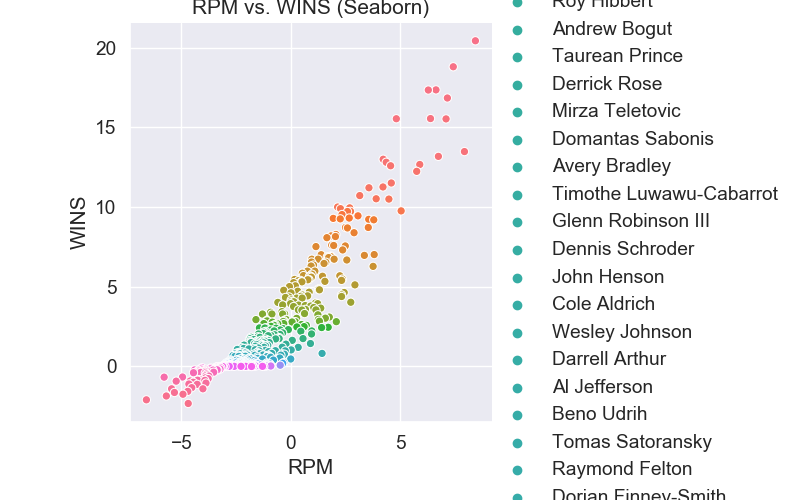

Text(0.5, 1, 'RPM vs. WINS (Seaborn)')

In [358]:
# scatter plots using Matplotlib to show relationship between RPM and WINS
plt.scatter(NBA['RPM'], NBA['WINS']) # RPM= x-axis, WINS= y=axis
plt.title('RPM vs. WINS (Matplotlib)')
# scatter plots using Seaborn to show relationship between RPM and WINS
sns.relplot(x='RPM', y='WINS', hue='NAME', data=NBA)
plt.title('RPM vs. WINS (Seaborn)')

__Result__: Both Matplotlib and Seaborn data show that there is a proportional relationship between WINS and RPM. 

<IPython.core.display.Javascript object>


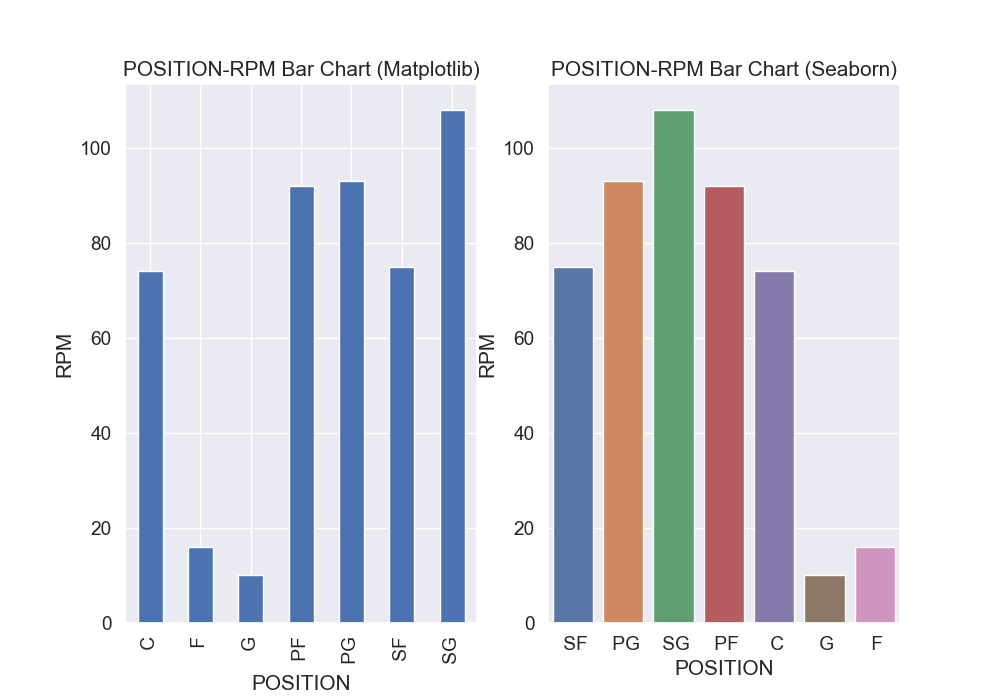

In [364]:
# side-by-side barplot Matplotlib and Seaborn for Team attribute 
# to show the top 3 positions that have the highest rate of RPM
plt.figure(figsize=(10,7))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# matplotlib graph 
#NBA['POSITION'].value_counts().plot.bar()
position_rpm = NBA.groupby('POSITION').count()['RPM']
position_rpm.plot.bar();

# give the plot a title
plt.title('POSITION-RPM Bar Chart (Matplotlib)')
plt.xlabel('POSITION')
plt.ylabel('RPM')

# define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# Seaborn graph of Position
sns.countplot(x='POSITION', data=NBA)

# give the plot a title
plt.title('POSITION-RPM Bar Chart (Seaborn)')
plt.xlabel('POSITION')
plt.ylabel('RPM')
plt.show()

__Result__: According to the both graphs above, the top 3 positions that have the highest rate of RPM are __SG, PG and PF__. 

<IPython.core.display.Javascript object>


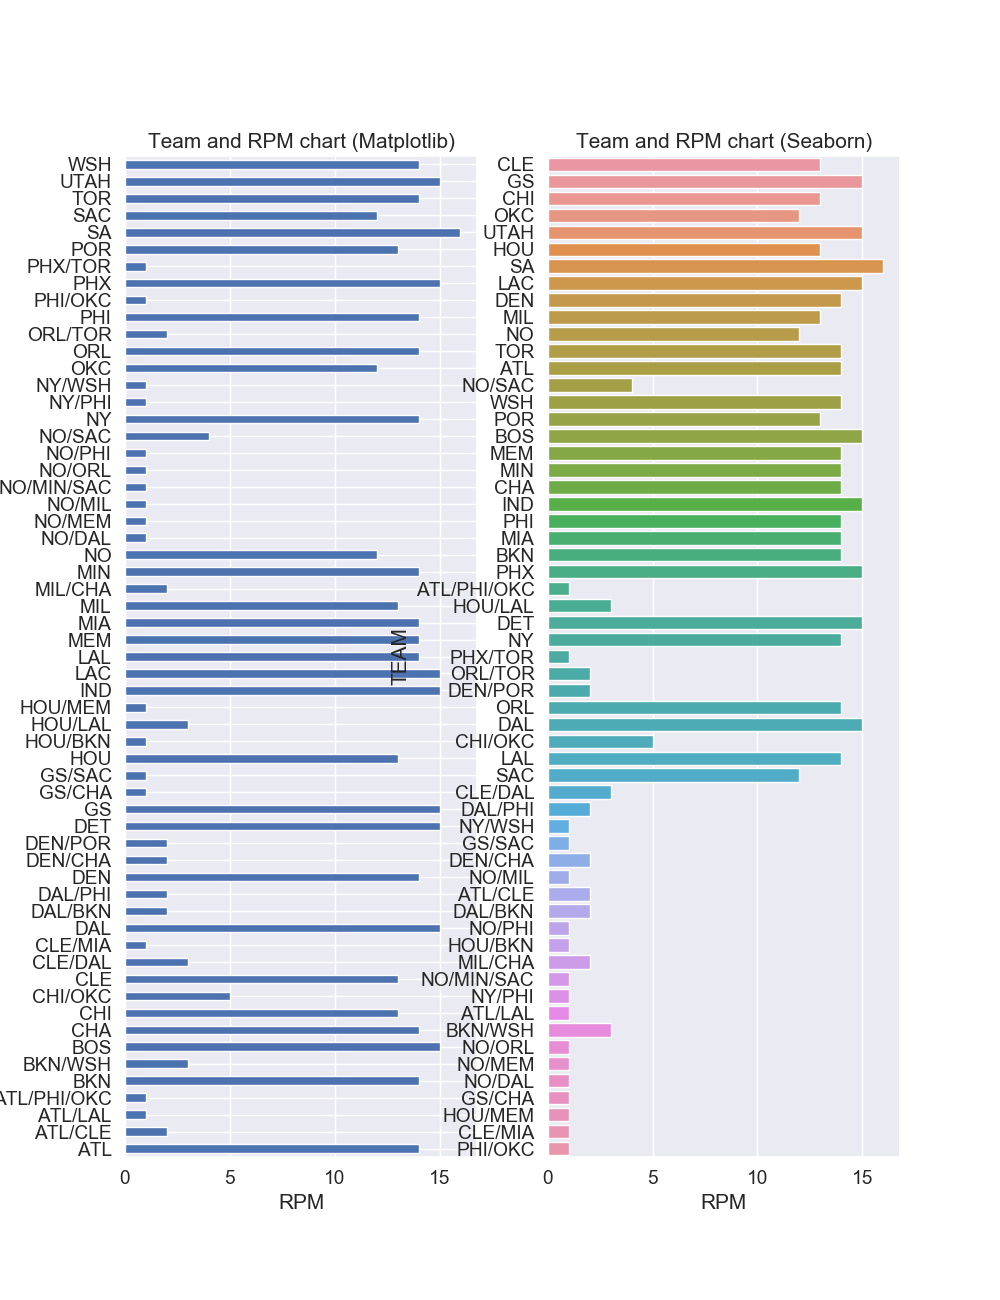

In [387]:
# Which teams are in the top 3? 

# side-by-side barplot Matplotlib and Seaborn for Team attribute
# define a new figure for plotting
plt.figure(figsize=(10,13))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# matplotlib graph of Team
#NBA['TEAM'].value_counts().plot.bar()
gender_count = NBA.groupby('TEAM').count()['RPM']
gender_count.plot.barh();

# give the plot a title
plt.title('Team and RPM chart (Matplotlib)')
plt.xlabel('RPM')
plt.ylabel('TEAM')

# define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# Seaborn graph of TEAM
sns.countplot(y='TEAM',data=NBA)

# give the plot a title
plt.title('Team and RPM chart (Seaborn)')
plt.xlabel('RPM')
plt.ylabel('TEAM')
plt.show()

__Result__: According to the graphs above, __SA, DAL, GS, UTAH, LAC, BOS, IND, PHX and DET__ are 9 teams have the highest RPM value. 

## Part 4: Inference 
#### Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic, and for each graphic you create you must do so using both Matplotlib and Seaborn (as described in Part 3 above). Include a narrative explaining your research approach and findings.

<IPython.core.display.Javascript object>


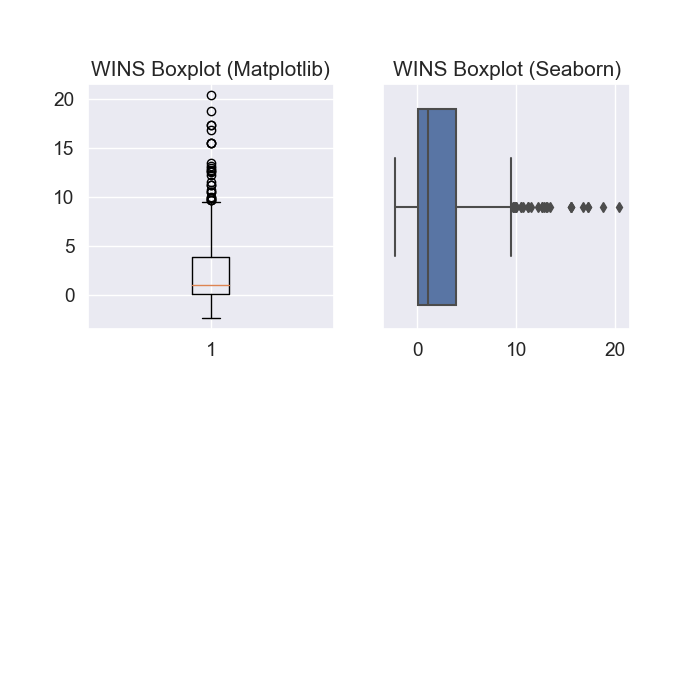

Text(0.5, 1.0, 'WINS Boxplot (Seaborn)')

In [398]:
# side-by-side boxplot Matplotlib and Seaborn for WINS
wins = NBA['WINS']

# define a new figure 
plt.figure(figsize=(7,7))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)

# Matplotlib boxplot for wins
plt.boxplot(x= wins)

# give the plot a title
plt.title('WINS Boxplot (Matplotlib)')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)

# Seaborn boxplot for wins
sns.boxplot(tuple(wins))

# give the plot a title
plt.title('WINS Boxplot (Seaborn)')

__Result__: The boxplot shows that the median for WINS. Boxplot can show the outliers including extreme values at the top or bottom of the plot. There is no extreme values at the bottom of the plot, but almost all values are at the top of the plot. 

In [331]:
NBA.corr() # correlation matrix for the data

,GP,MPG,ORPM,DRPM,RPM,WINS
GP,1.000000,0.667911,0.450144,-0.001908,0.364163,0.487524
MPG,0.667911,1.000000,0.660743,0.020218,0.549370,0.694266
ORPM,0.450144,0.660743,1.000000,-0.070910,0.766028,0.809192
DRPM,-0.001908,0.020218,-0.070910,1.000000,0.586870,0.404189
RPM,0.364163,0.549370,0.766028,0.586870,1.000000,0.917313
WINS,0.487524,0.694266,0.809192,0.404189,0.917313,1.000000


<IPython.core.display.Javascript object>


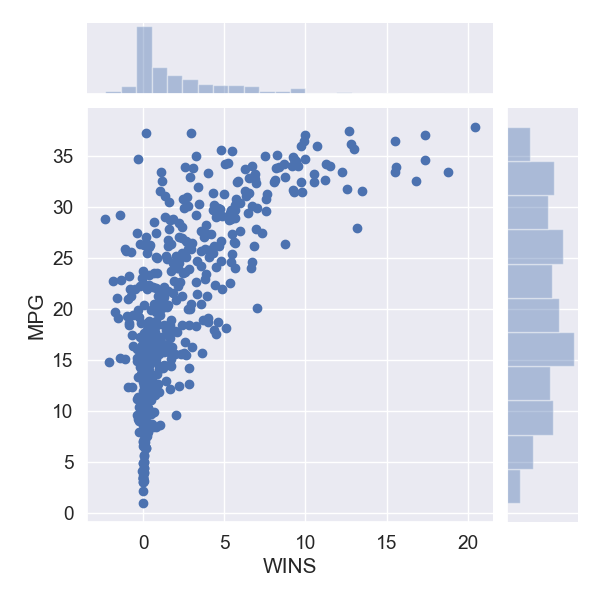

In [389]:
sns.jointplot(x='WINS', y='MPG', data=NBA)
# Seems like that attributes'WINS' and 'MPG' is uncorrelated. 
# create this plot to prove that MPG doesn't have much effects on WINS. 

__Result__: The plot above that MPG doesn't have much effects on WINS. 

## Part 5: Conclusion
#### A brief, concise narrative explaining your conclusions.

From the analysis on the dataset, we were able to find the answers for our research questions:

__- What is the relationship between the RPM and WINS?__: Both Matplotlib and Seaborn data show that there is a proportional relationship between WINS and RPM. The plot between MPG and WINS shows that MPG doesn't have much effects on WINS. Therefore, RPM is the most effective, relative method with WINS. 

__- What are the top 3 positions that have the highest rate of RPM?__ : the top 3 positions that have the highest rate of RPM are __SG, PG and PF__.

__- Which 9 teams have the highest RPM value?__ SA, DAL, GS, UTAH, LAC, BOS, IND, PHX and DET are 9 teams have the highest RPM value.

## References

- Sport info: http://www.espn.com/nba/statistics/rpm/_/page/3/sort/ORPM
- Glossaries: https://www.basketball-reference.com/about/glossary.html
- Seaborn: https://seaborn.pydata.org/generated/seaborn.countplot.html